# Star Wars Survey
In this project, we'll be looking at the data acquired by the team at FiveThirtyEight when they wanted to learn more about Star Wars fans. In particular, they wondered if the rest of the country realized that "Episode V: The Empire Strikes Back" is clearly the best of the Star Wars Movies. The team received over 800 responses, which you can download from their GitHub Repository.

There were many questions asked - some as simple as "Have you seen this movie?" to other more obscure questions such as "Which character shot first?". The answers vary across the board, and in this project we'll be organizing and examining this data to see if the people really do think Episode 5 is the best.

Additionally, we'll try to dive a little deeper into the data to see if we can discover any interesting connections between the Star Wars Universe, and the people who enjoy it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars=pd.read_csv('starwars.csv', encoding='ISO-8859-1')
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning data
* Remove first row to match the original dataset.
* Convert scientific notation to int64 in RespondentID column.

In [5]:
star_wars=star_wars.drop(axis=0,index=0)


In [14]:
star_wars.reset_index(drop=True)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [15]:
star_wars['RespondentID']=star_wars['RespondentID'].astype('int64')

In [26]:
star_wars=star_wars.reset_index()


ValueError: cannot insert level_0, already exists

In [32]:

star_wars=star_wars.drop('index',1)


KeyError: "labels ['index'] not contained in axis"

In [33]:
star_wars.head()

,level_0,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [35]:
star_wars=star_wars.drop('level_0',1)

In [36]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## To make some things easier down the road, we'll be converting any "Yes/No" answers to boolean values of True/False. This will make the data easier to work with.



In [38]:
yes_no={'Yes': True,
       'No':False}
cols=['Have you seen any of the 6 films in the Star Wars franchise?',
     "Do you consider yourself to be a fan of the Star Wars film franchise?"]
for c in cols:
    star_wars[c]=star_wars[c].map(yes_no)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the "Which have you seen?" columns
Simply looking at this chart can be a bit overwhelming. A lot of the column names are extremely long, illogical, or unnamed. We can clean this up by renaming or turning the answers into booleans.



In [41]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [42]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [45]:
rename_cols={'Have you seen any of the 6 films in the Star Wars franchise?': 'saw_any',
             'Do you consider yourself to be a fan of the Star Wars film franchise?': 'is_fan'}

In [50]:
star_wars=star_wars.rename(columns=rename_cols)

In [51]:
star_wars['saw_any'].value_counts(dropna=False)

True     936
False    250
Name: saw_any, dtype: int64

In [52]:
star_wars['is_fan'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: is_fan, dtype: int64

In [53]:
star_wars.head()

,RespondentID,saw_any,is_fan,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [54]:
rename_cols_seen={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                        'Unnamed: 4': 'seen_2',
                        'Unnamed: 5': 'seen_3',
                        'Unnamed: 6': 'seen_4',
                        'Unnamed: 7': 'seen_5',
                        'Unnamed: 8': 'seen_6'}
star_wars=star_wars.rename(columns=rename_cols_seen)

In [55]:
for v in range(1,7):
    col_names='seen_{}'.format(v)
    print('value_counts in', col_names)
    print(star_wars[col_names].value_counts(dropna=False))


value_counts in seen_1
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
value_counts in seen_2
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
value_counts in seen_3
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
value_counts in seen_4
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
value_counts in seen_5
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
value_counts in seen_6
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64


In [56]:
six_movies={}
map_movies={}
for v in range(1,7):
    col_name='seen_{}'.format(v)
    move_mames=star_wars.iloc[0, v+2]
    six_movies[v]=move_mames
    map_movies[move_mames]=True
map_movies[np.nan]=False

In [57]:
six_movies

{1: 'Star Wars: Episode I  The Phantom Menace',
 2: 'Star Wars: Episode II  Attack of the Clones',
 3: 'Star Wars: Episode III  Revenge of the Sith',
 4: 'Star Wars: Episode IV  A New Hope',
 5: 'Star Wars: Episode V The Empire Strikes Back',
 6: 'Star Wars: Episode VI Return of the Jedi'}

In [58]:
map_movies

{'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True,
 nan: False}

In [59]:
for v in range(1,7):
    col_name='seen_{}'.format(v)
    star_wars[col_name]=star_wars[col_name].map(map_movies)

In [60]:
star_wars.head()

,RespondentID,saw_any,is_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the six 'Rank your favorite' columns
Let's rename these six columns. And to enable analysis, let's convert them to floats.



In [63]:
col_name_ranking={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                        'Unnamed: 10': 'ranking_2',
                        'Unnamed: 11': 'ranking_3',
                        'Unnamed: 12': 'ranking_4',
                        'Unnamed: 13': 'ranking_5',
                        'Unnamed: 14': 'ranking_6'}
star_wars=star_wars.rename(columns=col_name_ranking)

In [64]:
star_wars.columns

Index(['RespondentID', 'saw_any', 'is_fan', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [71]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

In [73]:
for v in range(1,7):
    col_name='ranking_{}'.format(v)
    print('value_counts in', col_name)
    print(star_wars[col_name].value_counts(dropna=False).sort_index())

value_counts in ranking_1
 1.0    129
 2.0     71
 3.0    130
 4.0    237
 5.0    100
 6.0    168
NaN     351
Name: ranking_1, dtype: int64
value_counts in ranking_2
 1.0     32
 2.0    116
 3.0    103
 4.0    183
 5.0    300
 6.0    102
NaN     350
Name: ranking_2, dtype: int64
value_counts in ranking_3
 1.0     36
 2.0     47
 3.0    150
 4.0    182
 5.0    203
 6.0    217
NaN     351
Name: ranking_3, dtype: int64
value_counts in ranking_4
 1.0    204
 2.0    135
 3.0    127
 4.0    130
 5.0     79
 6.0    161
NaN     350
Name: ranking_4, dtype: int64
value_counts in ranking_5
 1.0    289
 2.0    235
 3.0    106
 4.0     47
 5.0    118
 6.0     41
NaN     350
Name: ranking_5, dtype: int64
value_counts in ranking_6
 1.0    146
 2.0    232
 3.0    220
 4.0     57
 5.0     36
 6.0    145
NaN     350
Name: ranking_6, dtype: int64


# Analysis
## Some preparations
We'll create some 'helper lists' for easy selection of a subset of columns. Also we will delete some rows that seem not suitable to include in our analysis.



In [74]:
seen_col=[]
rank_col=[]
for v in range(1,7):
    seen_col_name='seen_{}'.format(v)
    rank_col_name='ranking_{}'.format(v)
    seen_col.append(seen_col_name)
    rank_col.append(rank_col_name)
print(seen_col)
print(rank_col)

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']


Let's try to find the highest ranked movie. In the survery, users were asked to give a numeric ranking to each of the movies they had seen - 1 being their favorite, 6 being their least favorite. We'll need to take the average value of each movie column to come up with their individual rankings. This means that the lower the ranking, the better. This is very important to remember!

In [77]:
rank_means=star_wars[rank_col].mean()
rank_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

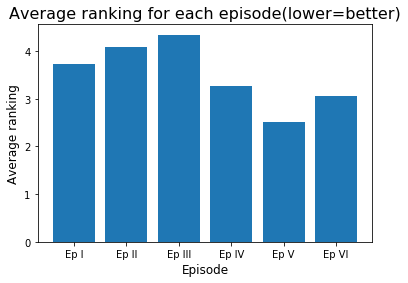

In [81]:
movies=['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']
plt.bar(movies,rank_means)
plt.title('Average ranking for each episode(lower=better)', fontsize=16)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Average ranking', fontsize=12)
plt.show()

So that appears to confirm what 538 stated. Episode V: The Empire Strikes Back is clearly the most favorite movie. (Remember: lower numbers means higher rankings.) And more in general, the first trilogy (episodes IV, V, VI) is more popular than the second trilogy (episodes I, II, III).



## Analysis - How Many People Watched Each Movie
Now we can analyze the total number of people that watched each movie. Remember that the movie releases were in the following order: IV, V, VI, I, II ,III.

In [84]:
total_seen=star_wars[seen_col].sum()
total_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

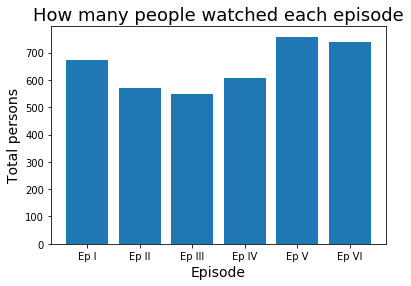

In [89]:
plt.bar(movies, total_seen)
plt.title('How many people watched each episode',fontsize=18)
plt.xlabel('Episode',fontsize=14)
plt.ylabel('Total persons',fontsize=14)
plt.show()

What we see that episode V is not only the most popular one in terms of ranking, but also the one that has been seen most. Followed by episode VI, also both for ranking and number of people who watched.
It seems that the first trilogy (episodes IV, V, VI) are most popular.



## Analysis - Males vs. Females 

In [90]:
males=star_wars[star_wars['Gender']=='Male']
female=star_wars[star_wars['Gender']=='Female']

In [102]:
female_seen=female[seen_col].sum()
female_seen

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

In [93]:
female_rank=female[rank_col].mean()
female_rank

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

In [94]:
male_seen=males[seen_col].sum()
male_rank=males[rank_col].mean()

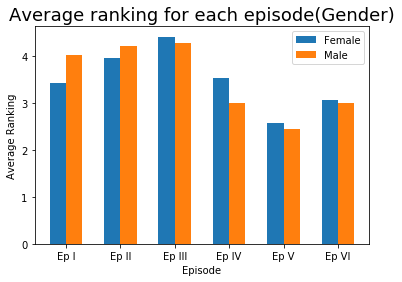

In [99]:
fig, ax=plt.subplots(figsize=(6,4))
plt.title('Average ranking for each episode(Gender)', fontsize=18)
barwidth=0.3
ind_f=np.arange(len(female_rank))
ind_m=np.arange(len(male_rank))
plt.bar(ind_f, female_rank,width=barwidth,label='Female')
plt.bar(ind_m+barwidth, male_rank, width=barwidth,label='Male')

plt.xticks(ind_f+barwidth/2,movies)
plt.xlabel('Episode')
plt.ylabel('Average Ranking')
plt.legend()
plt.show()

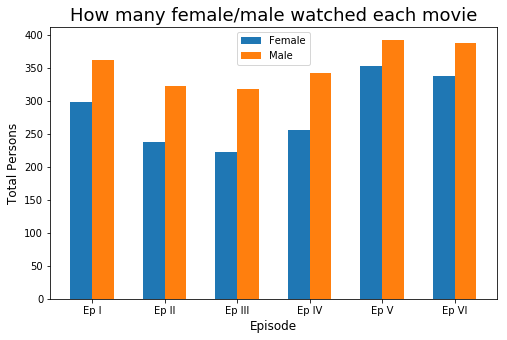

In [107]:
fig, ax=plt.subplots(figsize=(8,5))
plt.bar(ind_f, female_seen, width=barwidth, label='Female')
plt.bar(ind_m+barwidth, male_seen, width=barwidth, label='Male')
plt.xticks(ind_f+barwidth/2, movies)
plt.title('How many female/male watched each movie',fontsize=18)
plt.xlabel('Episode',fontsize=12)
plt.ylabel('Total Persons',fontsize=12)
plt.legend(loc='best')
plt.show()

All episodes were watched more by men then women. (Actually, there were simply more male survey respondents, but without having done the math, it seems that that does not account for this difference: men just watched more episodes.) The relative difference seems to have increased over time for the more recently released episodes (I, II, III).

# Summary of observations
* The most popular episode is Episode V: The empire strikes back. It was watched most and on average ranked as best.
* The first trilogy (episodes IV, V, VI) is generally more popular that the second trilogy (episodes I, II, III)
* These observations apply both men and women alike, although men seem to be more outspoken about their favorite episodes